# Project Proposal

### Title:

Given these 13 factors, does the patient have heart disease?

### Introduction:

Heart disease encompasses a group of conditions that can impair the structure or function of the heart. It can be caused by medical conditions that involve high blood pressure, high cholesterol levels, or lifestyle factors such as insufficient physical activity. Additionally, there are risk factors that increase heart disease that cannot be controlled such as sex, age, and genetics. The Heart Disease dataset from the UCI Machine Learning Repository identifies 13 factors. The objective of our project is to examine some of these potential factors to identify patterns and make predictions that answer our research question: Given these 13 factors, does the patient have heart disease?

### Preliminary exploratory data analysis:

In [17]:
library(tidyverse)

In [18]:
# ?read_csv

In [19]:
cleavland <-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleavland) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
cleavland <- cleavland |>
    mutate(Number_of_Major_Vessels = as.numeric(Number_of_Major_Vessels)) |>
    mutate(Thal = as.numeric(Thal))
                                                
# cleavland
# test

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [20]:

cleavland0 <- cleavland |>
    filter(Heart_Disease_Diagnosis == 0)
# cleavland0
cleavland1 <- cleavland |>
    filter(Heart_Disease_Diagnosis != 0) |>
    mutate(Heart_Disease_Diagnosis = 1)
# cleavland1
cleavland <- rbind(cleavland0, cleavland1)
# cleavland

In [21]:
library(tidymodels)

In [22]:
set.seed(1)
data_split <- initial_split(cleavland, prop = 0.75, strata = Heart_Disease_Diagnosis)
training_data <- training(data_split)
testing_date <- testing(data_split)
training_data

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
64,1,1,110,211,0,2,144,1,1.8,2,0,3,0
58,0,1,150,283,1,2,162,0,1.0,1,0,3,0


In [23]:
mean_table <- training_data |>
    colMeans(na.rm = TRUE) 
mean_table.matrix = matrix(data = mean_table, nrow = 1, byrow = TRUE)
mean_table.df = as.data.frame(mean_table.matrix)
colnames(mean_table.df) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
mean_table = mean_table.df
mean_table

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.9207,0.6828194,3.15859,132.7709,246.9604,0.1453744,0.9911894,149.3084,0.3259912,1.04185,1.603524,0.6977778,4.725664,0.4581498


`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


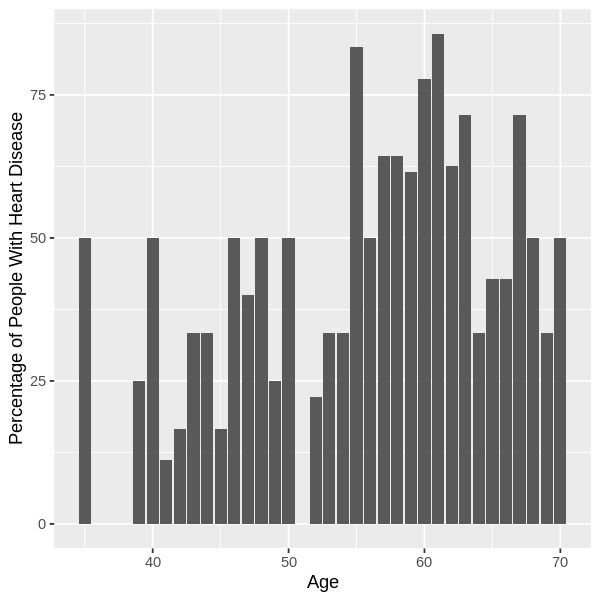

In [34]:
heart_age_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_table <- merge(heart_age_table0, heart_age_table1, by="Age") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)
#heart_count_table

heart_age_plot <- ggplot(heart_age_table, aes(x = Age, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Age", y = "Percentage of People With Heart Disease")
heart_age_plot

`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.


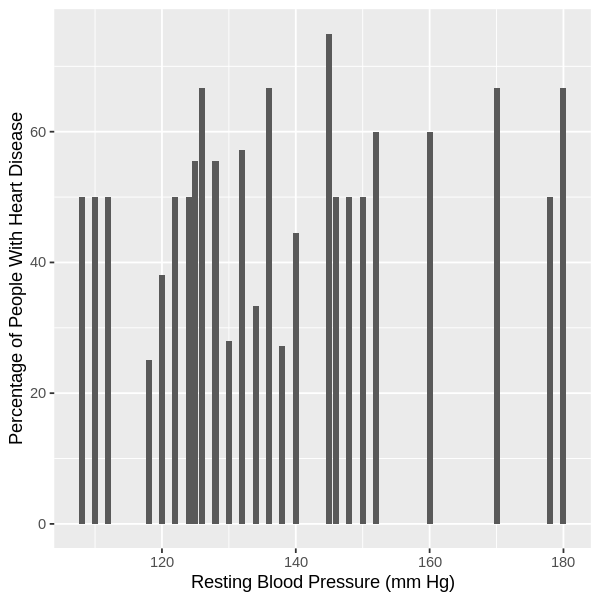

In [35]:
heart_bp_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table <- merge(heart_bp_table0, heart_bp_table1, by="Resting_Blood_Pressure") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)
#heart_count_table

heart_bp_plot <- ggplot(heart_bp_table, aes(x = Resting_Blood_Pressure, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Resting Blood Pressure (mm Hg)", y = "Percentage of People With Heart Disease")
heart_bp_plot

`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.


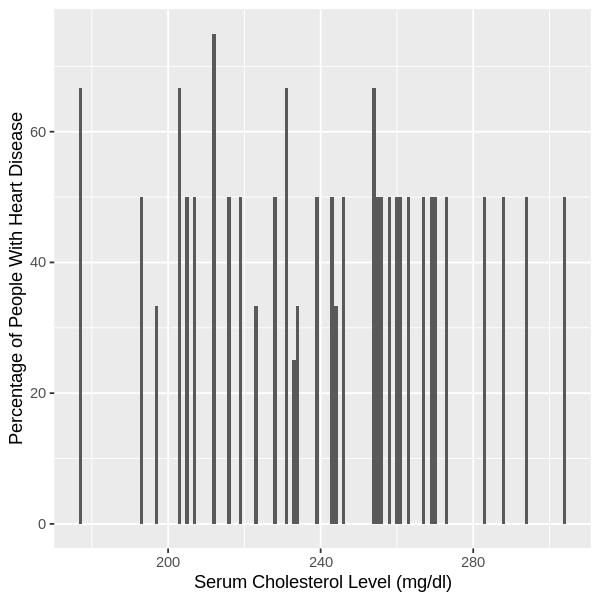

In [36]:
heart_chol_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table <- merge(heart_chol_table0, heart_chol_table1, by="Cholesterol") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)
#heart_count_table

heart_chol_plot <- ggplot(heart_chol_table, aes(x = Cholesterol, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Serum Cholesterol Level (mg/DL)", y = "Percentage of People With Heart Disease")
heart_chol_plot

`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.


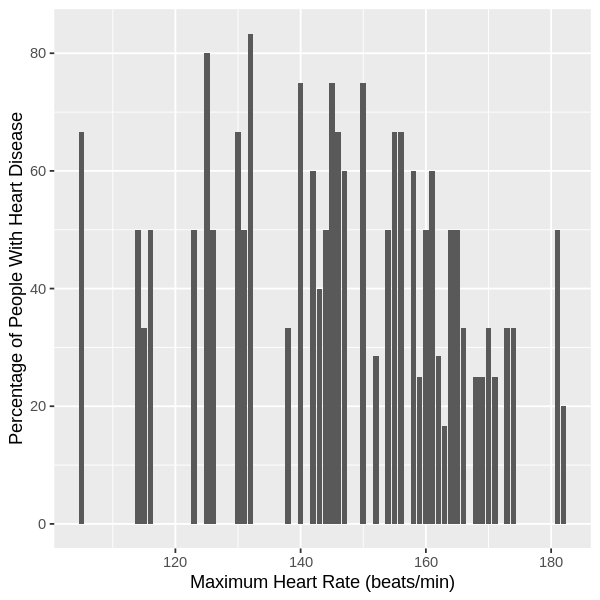

In [38]:
heart_hr_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table <- merge(heart_hr_table0, heart_hr_table1, by="Max_Heart_Rate") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)
#heart_count_table

heart_hr_plot <- ggplot(heart_hr_table, aes(x = Max_Heart_Rate, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Maximum Heart Rate (beats/min)", y = "Percentage of People With Heart Disease")
heart_hr_plot

`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.


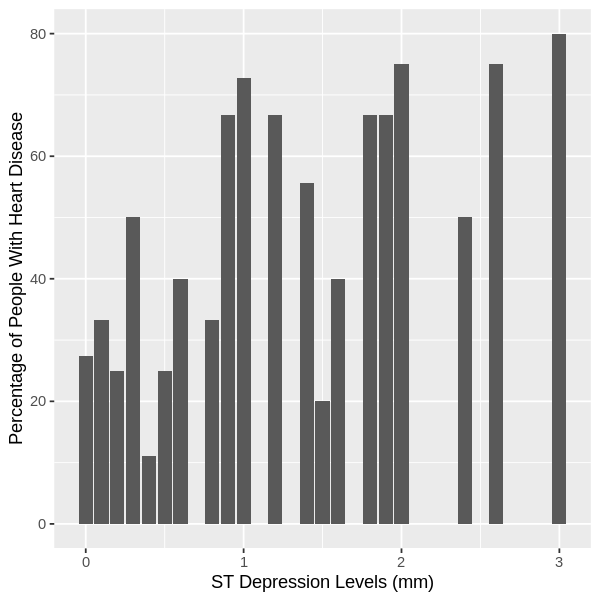

In [40]:
heart_st_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table <- merge(heart_st_table0, heart_st_table1, by="ST_Depression") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)
#heart_count_table

heart_st_plot <- ggplot(heart_st_table, aes(x = ST_Depression, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "ST Depression Levels (mm)", y = "Percentage of People With Heart Disease")
heart_st_plot

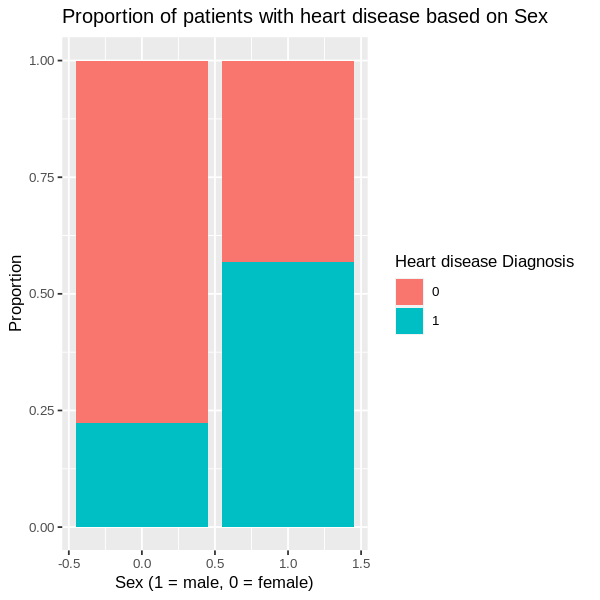

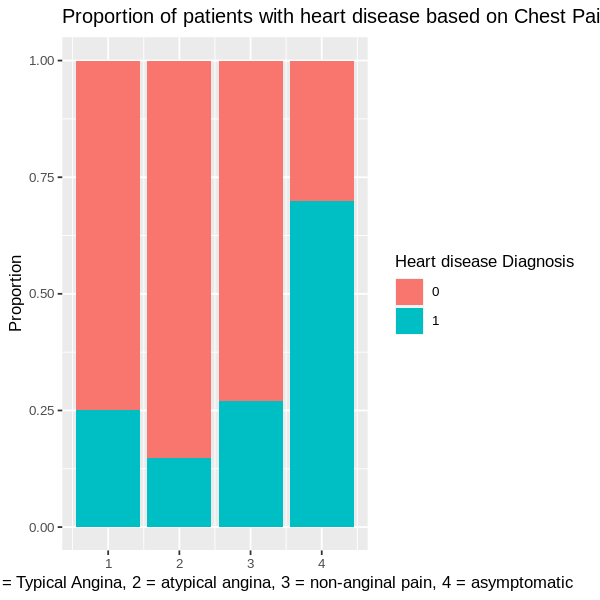

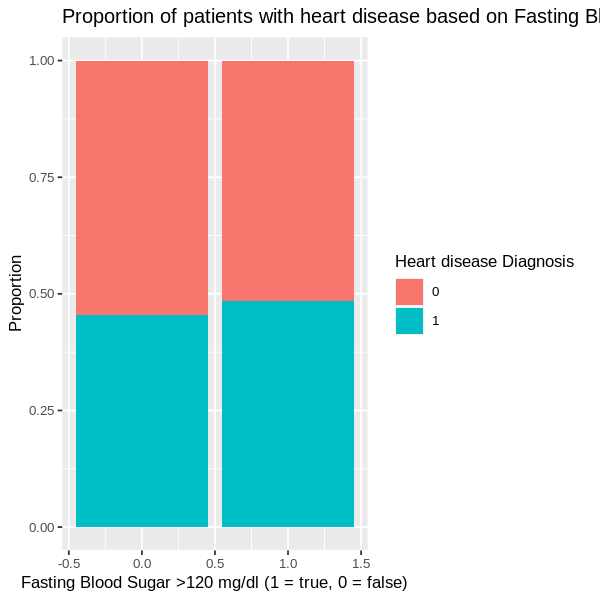

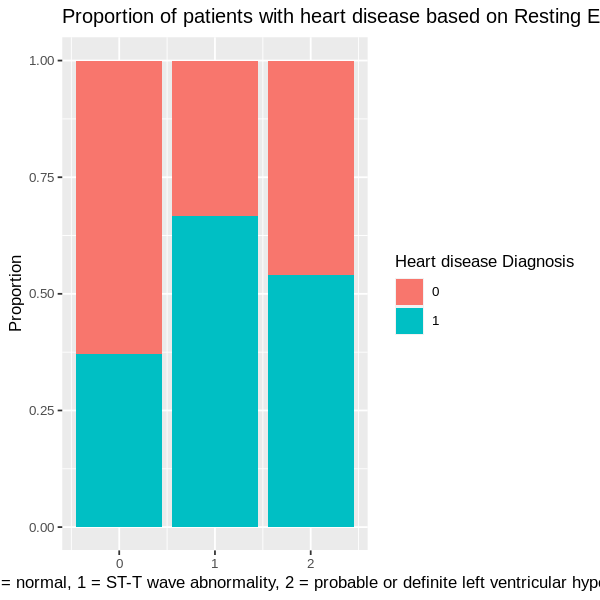

In [29]:
options(repr.plot.width = 5, repr.plot.height = 5)


sex_plot <- training_data |>
   ggplot(aes(x = Sex, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Sex (1 = male, 0 = female)", y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on Sex") +
   theme(text = element_text(size = 10))
sex_plot

cp_type_plot <- training_data |>
   ggplot(aes(x = Chest_Pain_Type, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Chest Pain Type (1 = Typical Angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic", 
        y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on Chest Pain Type") +
   theme(text = element_text(size = 10))
cp_type_plot

fbs_plot <- training_data |>
   ggplot(aes(x = Fasting_BloodSugar, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Fasting Blood Sugar >120 mg/dl (1 = true, 0 = false)", 
        y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on Fasting Blood Sugar Greater than 120mg/dl") +
   theme(text = element_text(size = 10))
fbs_plot

restecg_plot <- training_data |>
   ggplot(aes(x = Resting_ECG, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Resting Electrocardiographic (0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy)",
        y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on Resting Electrocardiographic Results") +
   theme(text = element_text(size = 10)) 
restecg_plot

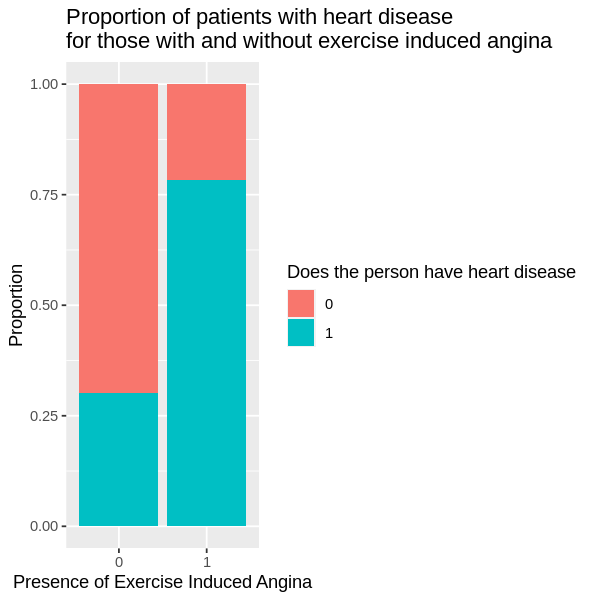

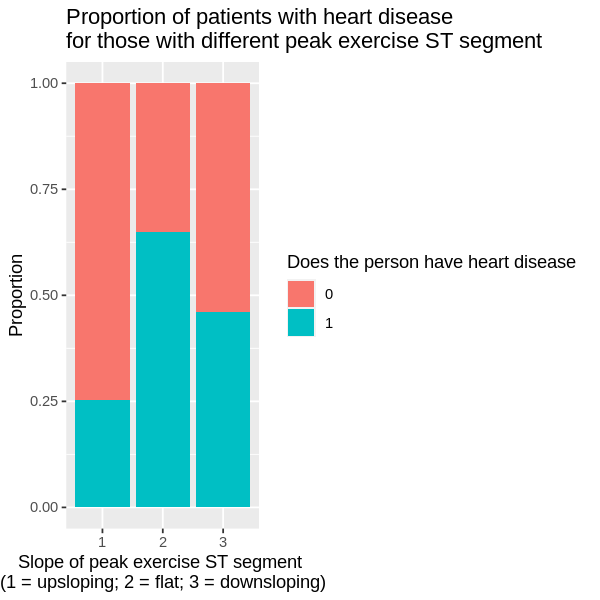

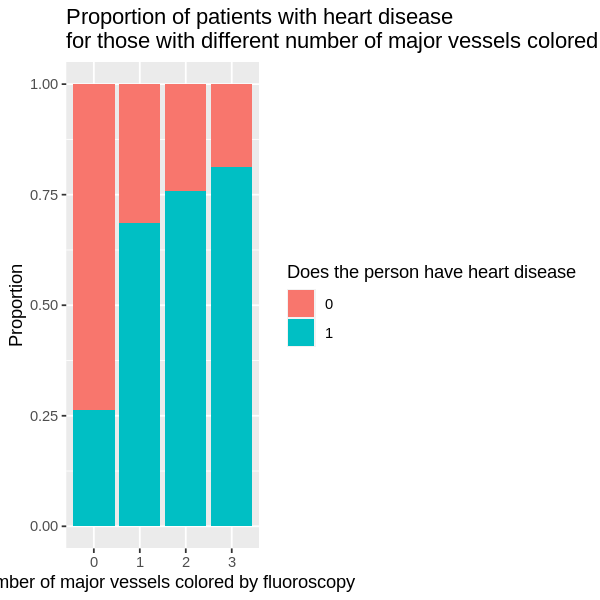

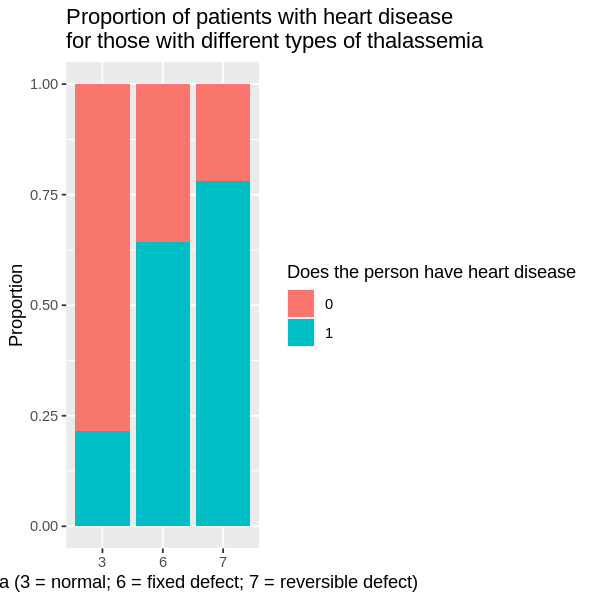

In [30]:
bar_plot9 <- training_data |>
   ggplot(aes(x = as_factor(Exercise_Induced_Angina), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Presence of Exercise Induced Angina") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with and without exercise induced angina")
bar_plot9

bar_plot11 <- training_data |>
   ggplot(aes(x = as_factor(Slope), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Slope of peak exercise ST segment \n(1 = upsloping; 2 = flat; 3 = downsloping)") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with different peak exercise ST segment")
bar_plot11

bar_plot12 <- training_data |>
   filter(!is.na(Number_of_Major_Vessels)) |>
   ggplot(aes(x = as_factor(Number_of_Major_Vessels), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Number of major vessels colored by fluoroscopy") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with different number of major vessels colored by fluoroscopy")
bar_plot12

bar_plot13 <- training_data |>
   filter(!is.na(Thal)) |>
   ggplot(aes(x = as_factor(Thal), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with different types of thalassemia")
bar_plot13

### Methods:

### Expected outcomes and significance: